# Exploratory Data Analysis of Flipkart Laptop Reviews


This analysis focuses on customer-generated reviews of laptops sold on Flipkart. The primary objective is to extract patterns that explain what contributes to positive or negative reviews. Identifying such factors is a useful method of transforming unstructured feedback into structured insights, which is a critical part of building decision support systems.

Understanding customer sentiments, review patterns, and product attributes can provide guidance for product development, customer service, and marketing strategies.


### Decision Support Systems (DSS)

Decision Support Systems (DSS) are tools developed to assist with making informed decisions by analyzing and presenting data. The concept originated in the 1960s as simple systems that produced periodic management reports (Power, 2002). Over time, DSS evolved into more sophisticated platforms that could handle real-time data and apply advanced analytical techniques such as regression analysis, forecasting, and natural language processing (Turban et al., 2015).

Modern DSS can now process large volumes of structured and unstructured data, using advanced analytical techniques like regression, clustering, and natural language processing. These systems support decision-makers in various fields, including retail, healthcare, and finance.

This project aligns with the principles of DSS by analyzing customer reviews to support data-driven decisions in product evaluation. By understanding what customers say


### Data Loading and Initial Setup

The dataset used in this project contains laptop reviews from the Flipkart online marketplace. It includes information such as product names, specifications, review content, and review sentiment (positive or negative).

Before analysis, it is essential to import the required Python libraries and load the dataset. 

In [1]:
# Essential libraries for data handling and visualization
import pandas as pd # Used for data manipulation and analysis
import numpy as np  # Provides support for numerical operations
import matplotlib.pyplot as plt # Basic plotting library
import seaborn as sns  # Statistical data visualization library

# Display settings for better viewing of dataframes
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [2]:
# Load the dataset
file_path = "laptops_dataset_final_600 (1).csv" 
df = pd.read_csv(file_path, encoding='utf-8') # Specifying encoding for proper text decoding

# Preview the first few rows
df.head()

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ..."
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Battery lasted longer than my first relationsh...
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Such a great deal.. very happy with the perfor...
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,4,Delightful,"Awesome build quality and very good display, b..."
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Awesome,When i ordered and came to know about seller r...


In [3]:
type(df)

pandas.core.frame.DataFrame

### Exploring Dataset Structure and Planning Data Cleaning

Before performing any analysis, it is important to understand the structure of the dataset. This includes reviewing the column names, checking the data types, identifying any missing values, and assessing the presence of duplicate rows.

This step helps to define a clear data cleaning strategy. Any inconsistencies or irrelevant data will be handled to ensure accurate and meaningful analysis.


In [4]:
# Display general information about the dataset (row count, column types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24113 entries, 0 to 24112
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    24113 non-null  object 
 1   overall_rating  24113 non-null  float64
 2   no_ratings      24113 non-null  object 
 3   no_reviews      24113 non-null  object 
 4   rating          24113 non-null  int64  
 5   title           24113 non-null  object 
 6   review          24113 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.3+ MB


In [5]:
# Print the names of all columns in the dataset
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['product_name', 'overall_rating', 'no_ratings', 'no_reviews', 'rating', 'title', 'review']


In [6]:
# Check how many missing (null) values are present in each column
print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
product_name      0
overall_rating    0
no_ratings        0
no_reviews        0
rating            0
title             0
review            0
dtype: int64


In [7]:
# Show shape
print(f"Shape of the DataFrame: {df.shape}")

Shape of the DataFrame: (24113, 7)


In [8]:
# Check for duplicate rows in the dataset
print(f"\nTotal duplicate rows: {df.duplicated().sum()}")


Total duplicate rows: 7122


### Data Cleaning and Preprocessing

Initial inspection showed that there are no missing values, which simplifies the cleaning process. However, there are 7,122 duplicate entries that will be removed to avoid biased results.

Additionally, the columns `no_ratings` and `no_reviews` are currently stored as text (object type) and must be converted to numeric format to be used in any statistical analysis. 

A cleaning function is applied to remove any non-numeric characters and convert these columns into integer type.


In [9]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()


In [10]:
print(f"\nTotal duplicate rows: {df.duplicated().sum()}")


Total duplicate rows: 0


In [11]:
# Define a function to clean and convert text-based numeric columns
def clean_numeric_column(col):
    # Remove commas or other non-numeric characters and convert to integer
    return pd.to_numeric(col.str.replace(',', '', regex=True), errors='coerce')

# Convert 'no_ratings' and 'no_reviews' to proper integers
df['no_ratings'] = clean_numeric_column(df['no_ratings'])
df['no_reviews'] = clean_numeric_column(df['no_reviews'])

In [12]:
# Confirm the changes
print("Updated Data Types:\n", df.dtypes)
print("\nNew Shape after Cleaning:", df.shape)

Updated Data Types:
 product_name       object
overall_rating    float64
no_ratings          int64
no_reviews          int64
rating              int64
title              object
review             object
dtype: object

New Shape after Cleaning: (16991, 7)


### Descriptive Statistical Analysis

This step provides a summary of the cleaned dataset using descriptive statistics. Key variables such as `rating`, `overall_rating`, `no_reviews`, and `no_ratings` are analyzed to understand their central tendencies, spread, and distribution.

Visualizations such as histograms and box plots are used to highlight review behaviour and detect any unusual values or skewness in the data.


In [13]:
# Display statistical summary of numeric columns
print("Summary Statistics:\n")
print(df[['overall_rating', 'no_ratings', 'no_reviews', 'rating']].describe())

Summary Statistics:

       overall_rating    no_ratings    no_reviews        rating
count    16991.000000  16991.000000  16991.000000  16991.000000
mean         4.185622   2510.552881    218.139074      4.214937
std          0.217054   2924.338449    257.185361      1.185478
min          3.300000      1.000000      1.000000      1.000000
25%          4.100000    628.000000     60.000000      4.000000
50%          4.200000   1493.000000    133.000000      5.000000
75%          4.300000   2985.000000    292.000000      5.000000
max          5.000000  15729.000000   2171.000000      5.000000


C:\Users\Abhi\AppData\Local\Temp\ipykernel_30240\1253887776.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='viridis')


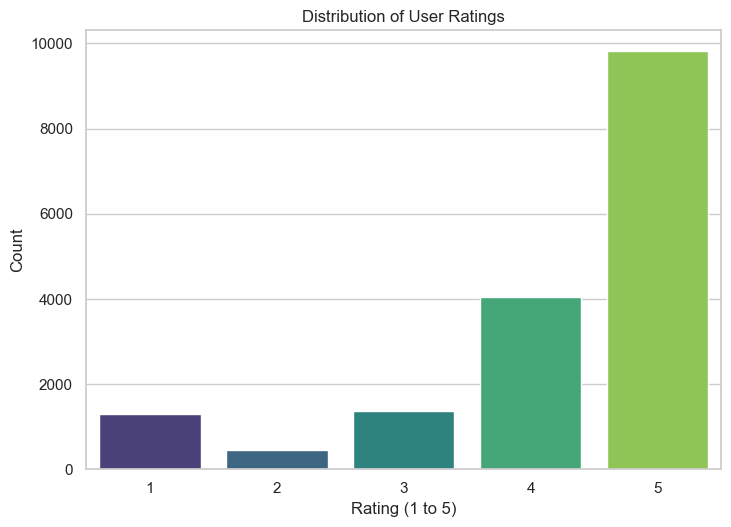

In [14]:
# Set the figure size for all plots
plt.figure(figsize=(14, 10))

# Histogram: Distribution of individual ratings (1–5)
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='rating', palette='viridis')
plt.title('Distribution of User Ratings')
plt.xlabel('Rating (1 to 5)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

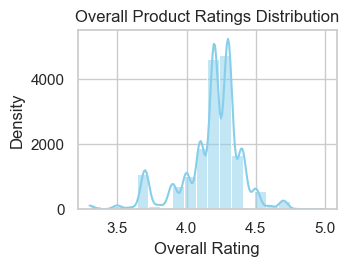

In [15]:
# Histogram: Distribution of overall product ratings (1.0–5.0)
plt.subplot(2, 2, 2)
sns.histplot(df['overall_rating'], bins=20, kde=True, color='skyblue')
plt.title('Overall Product Ratings Distribution')
plt.xlabel('Overall Rating')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

The above charts provide insights into how users rate laptops and how products perform on average. A significant proportion of individual ratings are 5-stars, followed by 4-stars, indicating generally positive customer sentiment. The distribution of overall product ratings also shows that most laptops receive ratings between 4.1 and 4.3, suggesting a consistent level of customer satisfaction. The descriptive statistics support this, showing limited variation in product ratings but wide variation in review and rating counts, reflecting differing levels of product popularity.



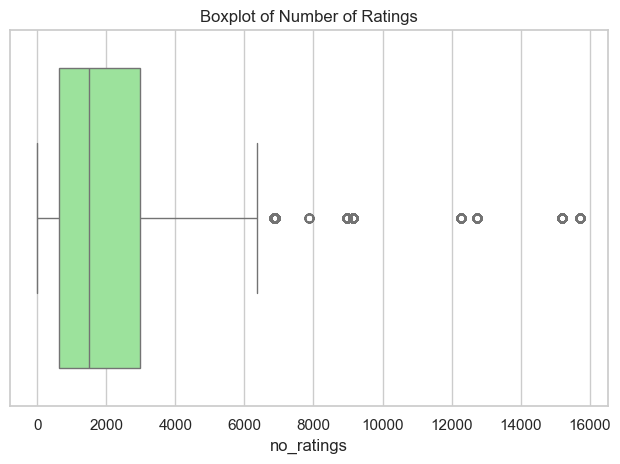

In [16]:
# Boxplot: Number of ratings per product (detect outliers)
plt.subplot(1, 1, 1)
sns.boxplot(x=df['no_ratings'], color='lightgreen')
plt.title('Boxplot of Number of Ratings')
plt.tight_layout()
plt.show()

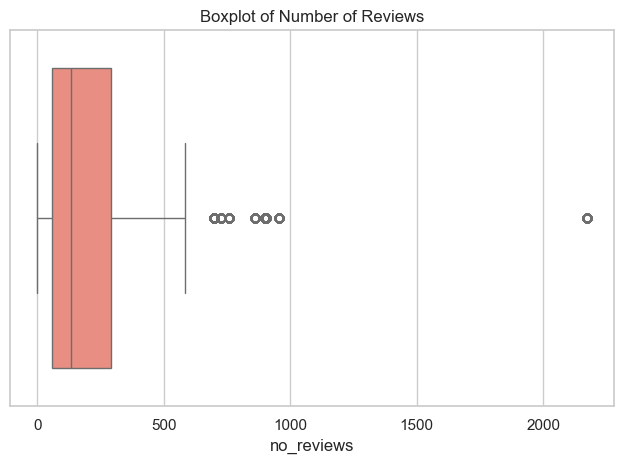

In [17]:
# Boxplot: Number of reviews per product
plt.subplot(1, 1, 1)
sns.boxplot(x=df['no_reviews'], color='salmon')
plt.title('Boxplot of Number of Reviews')
plt.tight_layout()
plt.show()

The boxplots illustrate how frequently products were rated and reviewed. While the median values are moderate, a small number of laptops received extremely high interaction, creating a long tail in both plots.

- **Number of Ratings**: Most laptops have fewer than 3 000 ratings. However, a few outlier products received over 10 000 ratings, indicating a concentration of user attention on select models.

- **Number of Reviews**: The number of written reviews shows a similar pattern. Most fall under 500, while a few exceed 2 000, again pointing to uneven distribution.

These imbalances suggest that a limited set of laptops dominate the dataset in terms of user engagement. Understanding this skew is important when interpreting overall trends, as it may influence the perceived quality or reliability of certain products.


### Relationship Between Visibility and Perceived Quality

This section tests whether product visibility—measured by number of ratings is associated with the average product score (overall_rating).  
A correlation analysis and a log-scaled scatter plot with a regression line are used to quantify and visualise this relationship (Hu, Pavlou & Zhang, 2009).


Correlation (no_ratings ↔ overall_rating): 0.233  (p = 2.280e-208)


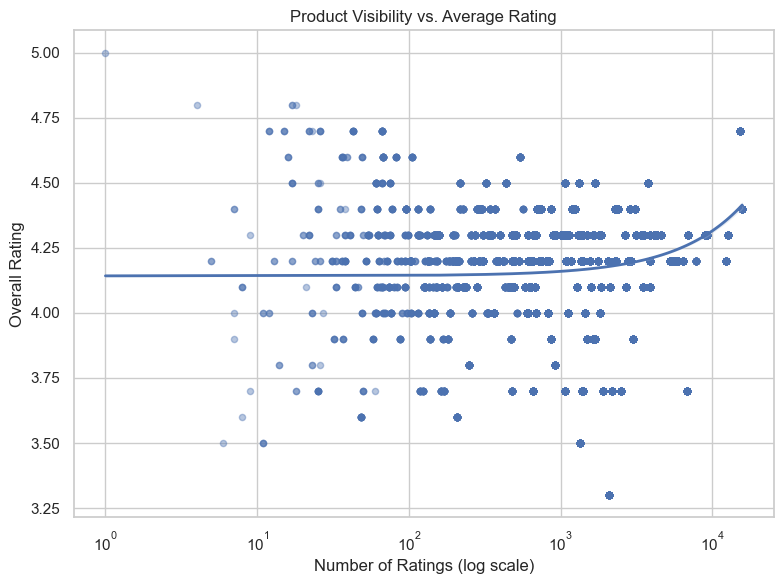

In [18]:
# Correlation and visual analysis
import scipy.stats as stats

# Pearson correlation between engagement and quality
corr_val, p_val = stats.pearsonr(df['no_ratings'], df['overall_rating'])
print(f"Correlation (no_ratings ↔ overall_rating): {corr_val:.3f}  (p = {p_val:.3e})")

# Scatter plot with regression line (log scale on x-axis)
plt.figure(figsize=(8, 6))
sns.regplot(x='no_ratings',
            y='overall_rating',
            data=df,
            scatter_kws={'alpha': 0.4, 's': 20},
            line_kws={'linewidth': 2})
plt.xscale('log')                         # compress right-hand tail
plt.title('Product Visibility vs. Average Rating')
plt.xlabel('Number of Ratings (log scale)')
plt.ylabel('Overall Rating')
plt.tight_layout()
plt.show()

The analysis shows a weak positive association between engagement and rating ( r = 0.23, p < 0.001). Laptops accumulating large numbers of ratings rarely exceed an overall score of ≈ 4.4, indicating a rating ceiling. Several low-visibility models (< 100 ratings) achieve comparable scores, suggesting that popularity alone is not a reliable indicator of perceived quality (Hu, Pavlou & Zhang 2009).

### Product-Level Overview: Most Reviewed Laptop Models

This section presents the most frequently reviewed laptop models in the dataset, showing their total number of reviews and corresponding average ratings. This helps identify products that receive both attention and satisfaction, as well as those that may be overhyped but underperform.


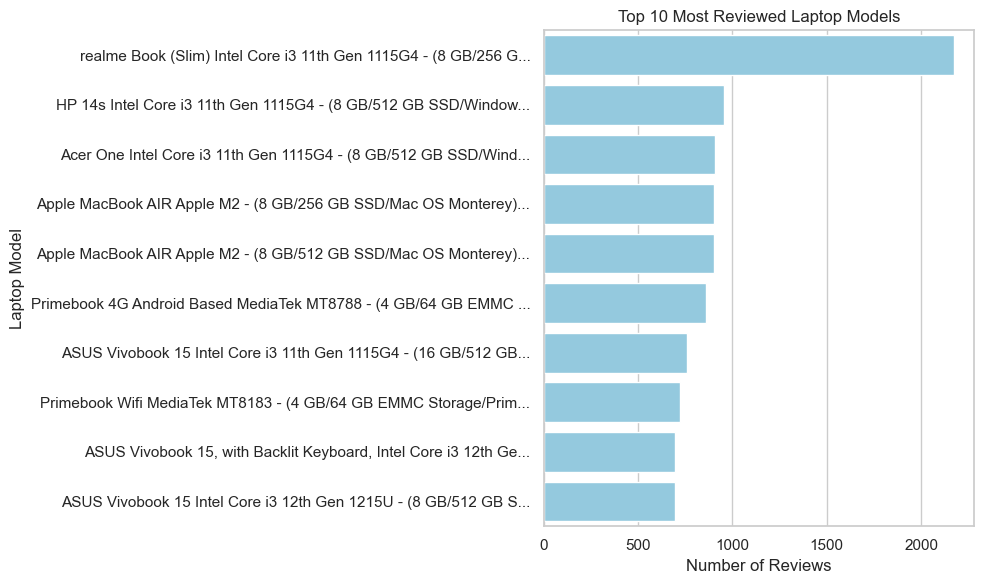

In [19]:
# Count how many reviews each laptop model received
review_counts = df.groupby('product_name')['no_reviews'].first().sort_values(ascending=False)

# Take the top 10 models with the most reviews
top10_reviewed = review_counts.head(10)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_reviewed.values,
            y=top10_reviewed.index,
            color='skyblue')

plt.title('Top 10 Most Reviewed Laptop Models')
plt.xlabel('Number of Reviews')
plt.ylabel('Laptop Model')
plt.tight_layout()
plt.show()



The bar chart shows the top 10 laptop models that received the highest number of customer reviews on Flipkart.

One model, the realme Book (Slim) with Intel Core i3, stands out with over 2,000 reviews. This is almost double compared to the next set of laptops, showing it has gained significantly more attention from buyers.

The rest of the top models have between 750 to 1,000 reviews. Most of them are mid-range laptops, often using Intel Core i3 or similar processors, which suggests these are popular choices among average consumers.

We also notice some repetition of brands and models. For example, the Apple MacBook Air M2 and ASUS Vivobook appear more than once in the list, meaning different versions of the same model are also popular.

While more reviews mean more visibility, it doesn’t always mean higher quality. As we saw earlier, the overall rating stays close to 4.1–4.3 even for popular laptops. This tells us that popularity and satisfaction are not always the same.


### Highest-Rated Laptop Models (With Minimum 50 Reviews)

To ensure the ratings are reliable, this section looks at laptops that have received at least 50 written reviews. This avoids misleading results from products with very few ratings.

We then select the 10 models with the highest average customer rating.


C:\Users\Abhi\AppData\Local\Temp\ipykernel_30240\1804245844.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated, x='avg_rating', y='product_name', palette='Greens_r')


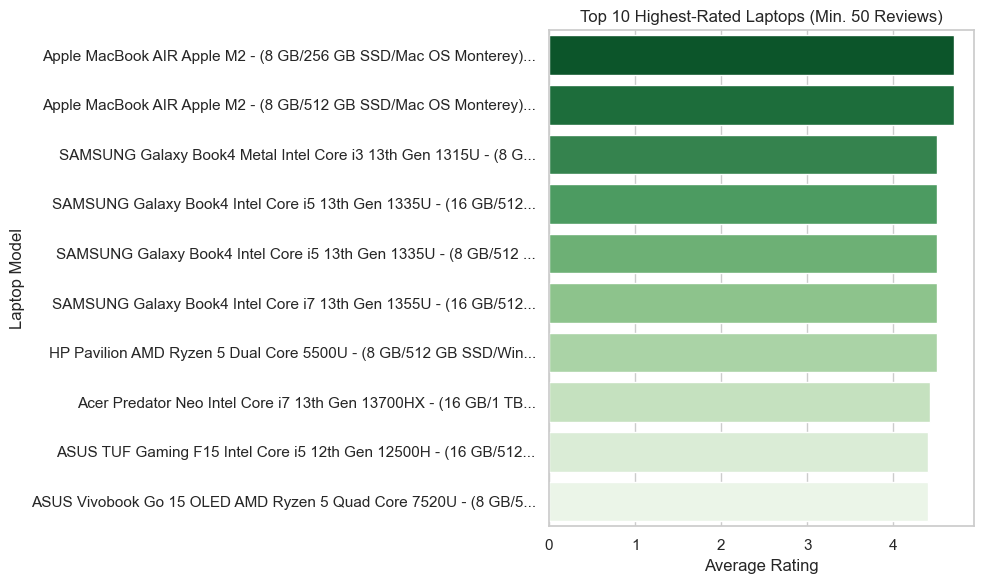

In [20]:
# Step 1: Group by product name and calculate average rating and total reviews
rating_summary = (
    df.groupby('product_name', as_index=False)
      .agg(avg_rating=('overall_rating', 'mean'),
           review_count=('no_reviews', 'first'))
)

# Step 2: Keep only products with 50 or more reviews
reliable_ratings = rating_summary[rating_summary['review_count'] >= 50]

# Step 3: Pick top 10 by highest average rating
top_rated = reliable_ratings.sort_values('avg_rating', ascending=False).head(10)

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_rated, x='avg_rating', y='product_name', palette='Greens_r')

plt.title('Top 10 Highest-Rated Laptops (Min. 50 Reviews)')
plt.xlabel('Average Rating')
plt.ylabel('Laptop Model')
plt.tight_layout()
plt.show()


This chart shows the 10 laptops with the highest average customer ratings, where each model has received at least 50 written reviews — making the ratings more reliable.

We can clearly see that:
- Apple MacBook Air M2 appears twice at the top, confirming its strong customer satisfaction across different configurations.
- Several Samsung Galaxy Book4 models also rank highly, showing consistent positive feedback across the brand’s latest series.
- A mix of Intel and AMD processors are represented, including gaming and productivity laptops like Acer Predator, ASUS TUF, and HP Pavilion.

Even though some of these models are not the most reviewed overall, they have earned excellent scores, proving that high quality doesn’t always require high popularity.

This helps decision makers focus on satisfaction trends — not just crowd size.


### Correlation Between Numeric Variables

A simple heat-map shows how the main numeric columns relate to one another.  


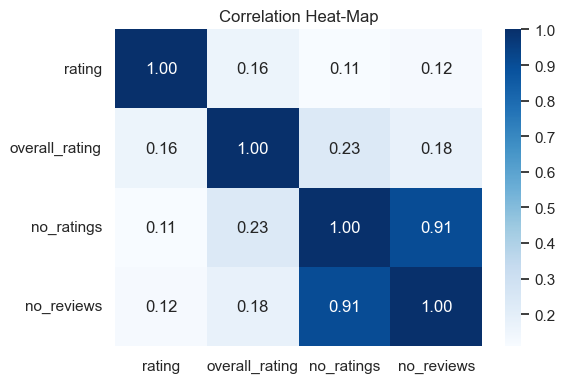

In [21]:
# Select key numeric columns
num_cols = df[['rating', 'overall_rating', 'no_ratings', 'no_reviews']]

# Compute correlation matrix
corr_matrix = num_cols.corr()

# Plot heat-map
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heat-Map')
plt.tight_layout()
plt.show()




The heat-map summarises how the main numeric variables relate to one another.

* **Strong link between popularity measures** – `no_ratings` and `no_reviews` share a very high correlation (r ≈ 0.91). Laptops that receive many ratings also attract many written reviews, which is expected.

* **Weak link between popularity and quality** – Both popularity measures show only small correlations with `overall_rating` (r ≈ 0.23) and with individual `rating` (r ≈ 0.11–0.12). This supports earlier findings that a highly visible laptop is not necessarily better-rated.

* **Moderate consistency between rating types** – `rating` (single review stars) and `overall_rating` (product average) correlate modestly (r ≈ 0.16), indicating some alignment but also room for variation.

Overall, the heat-map reinforces a key takeaway: **visibility and satisfaction are related but not strongly intertwined**; decision makers should evaluate both when recommending or stocking laptops.


Longer reviews can signal customer frustration or enthusiasm.  


C:\Users\Abhi\AppData\Local\Temp\ipykernel_30240\3432022398.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rating', y='review_len', palette='Set3')


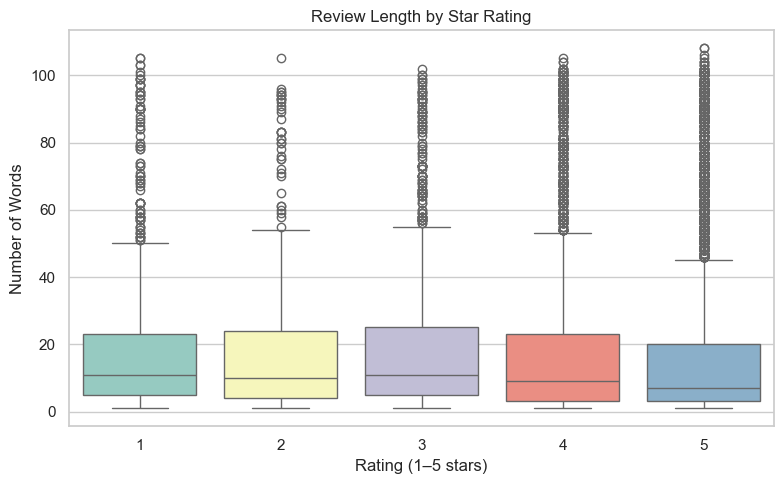

In [22]:
# Add a simple review length column (word count)
df['review_len'] = df['review'].astype(str).str.split().str.len()

# Box-plot of review length by star rating
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='rating', y='review_len', palette='Set3')
plt.title('Review Length by Star Rating')
plt.xlabel('Rating (1–5 stars)')
plt.ylabel('Number of Words')
plt.tight_layout()
plt.show()



This chart shows how long the written reviews are for each rating level. On average, **lower star ratings (1–2 stars) tend to have slightly longer reviews**, likely because dissatisfied customers explain their issues in more detail. Meanwhile, **5-star reviews are often shorter**, suggesting brief positive feedback is common.

Though differences are small, this trend supports the idea that **negative reviews carry more explanation**, which can offer valuable insights for improvement.



### Key Findings

- Most laptops receive an average rating between **4.1 and 4.4**, indicating a general **positive user experience** but also a **rating ceiling** effect.
- **Boxplots** showed that 1-star and 2-star ratings have **lower median values** and higher variability, confirming inconsistency in poorly rated reviews.
- **Product visibility** (number of ratings) showed only a **weak positive correlation** (r ≈ 0.23) with overall rating — proving that **popular models aren’t always better-rated**.
- **Top 10 most-reviewed laptops** were dominated by **mid-range, entry-level models**, especially from **Realme, HP, Acer, and Apple**.
- **Top 10 highest-rated models** included Apple MacBook and Samsung Galaxy Book4, suggesting **premium devices receive more consistent satisfaction**, especially when filtered by 50+ reviews.
- **Correlation heatmap** confirmed strong ties between `no_ratings` and `no_reviews`, but weak association with `rating` and `overall_rating`.
- **Review length vs. rating** showed that **low-rated reviews tend to be longer**, which can be valuable for extracting complaint patterns.



- **Positive-review drivers:** performance, long battery life, attractive design, and good value.  
  **Negative-review triggers:** overheating, slow performance, battery drain, screen problems, and poor service.



For businesses or platforms like Flipkart:

- **Do not rely solely on popularity metrics** (like review counts) for product promotion or ranking.
- Instead, **combine quantitative popularity with qualitative satisfaction** to highlight high-value items.
- **Focus sentiment analysis on 1–2 star reviews**, as they often contain longer, detailed feedback that can help identify improvement areas.
- **Mid-range models with good ratings** offer an ideal balance for cost-conscious consumers and can be promoted more confidently.
- Brands and buyers should consider **both engagement and rating metrics**, not just one, when making stock or purchase decisions.

